## Assignment 5
#### Name: Pranisaa Charnparttaravanit
#### ID: st121720


Program the quicksort and heapsort algorithm in python.

I believe that you already have the mergesort algorithm written in python.

It is perplexing to me that while all these three algorithms share the same complexity, i.e., O(n lg n).  Most commercial applications prefer quicksort.

Please do the followings:
1. Compare the actual time run for these three algorithms (compare using varying size of n)
2. Time the number of comparisons and exchanges of each algorithm (see slide 34 in the lecture slide for example).   
3.  Plot 2 and 3 (make a table if you like)

Submit the followings:
1. Python code in pdf (exported)
2. Your report  reporting your experiment findings - **no cover pages needed!**. (please keep them short - like one page but not one sentence!)

In [80]:
import numpy as np
import pandas as pd
import time 
import random
import math
import matplotlib.pyplot as plt

In [81]:
def lst(n):
    A = np.random.randint(-100,100,size=(1,n))
    np.random.seed(1)
    A = list(A[0])
    return A

### Heapsort

In [82]:
def max_heapify(arr,i,n):
    global count_comp
    global count_exc 
    l = 2*i + 1
    r = 2*i + 2
    largest = i
    count_comp += 2
    if l < n and arr[l] > arr[largest]:
        largest = l
    else: 
        largest = i
    if r < n and arr[r] > arr[largest] :
        largest = r
    if largest != i:
        count_exc += 1
        A_i = arr[i]
        arr[i] = arr[largest]
        arr[largest] = A_i
        max_heapify(arr,largest,n)
    
def build_max_heap(arr,n):
    global count_comp
    global count_exc 
    for i in range((len(arr)//2)-1,-1,-1):
        max_heapify(arr,i,n)

def heapsort(arr):
    global count_comp
    global count_exc 
    heapsize = len(arr)
    build_max_heap(arr,heapsize) 
    for i in range(heapsize-1,0,-1):
        count_exc += 1
        A_0 = arr[0]
        arr[0] = arr[i]
        arr[i] = A_0 
        max_heapify(arr,0,i)
    return arr

In [83]:
heaptime = []
heapcount_comp_time = []
heapcount_exc_time = []

def findheapsorttime(n):
    global count_comp
    global count_exc     
    count_comp = 0
    count_exc = 0    
    t0 = time.time()
    A = lst(n)
    heapsort(A)
    endtime = time.time()
    return (endtime - t0),count_comp,count_exc


n = [10,100,1000,10000]
for i in range(len(n)):
    heaptime_, count_comp_, count_exc_ = findheapsorttime(n[i])
    heaptime.append(heaptime_)
    heapcount_comp_time.append(count_comp_)
    heapcount_exc_time.append(count_exc_)
    
data = {'number of elements': n,
        'time':heaptime,
        'number of comparisons':heapcount_comp_time,
        'number of exchanges':heapcount_exc_time,}

df = pd.DataFrame(data, columns = ['number of elements','time', 'number of comparisons', 'number of exchanges'])
print (df)

   number of elements      time  number of comparisons  number of exchanges
0                  10  0.000342                     64                   27
1                 100  0.001391                   1240                  570
2                1000  0.016969                  19042                 9021
3               10000  0.221724                 257576               123788


### Quicksort

In [84]:
#Quick sort
def quicksort(A,p,r):
    global count_comp
    global count_exc     
    if p<r:
        q = partition(A,p,r)
        quicksort(A,p,q-1)
        quicksort(A,q+1,r)
    return A

def partition(A,p,r):
    global count_comp
    global count_exc     
    x = A[r]
    i = p-1
    for j in range(p,r-1):
        count_comp += 1
        if A[j] <= x:
            i += 1
            A[i],A[j] = A[j],A[i]
            count_exc += 1
    A[i+1],A[r] = A[r],A[i+1]
    count_exc += 1
    return i + 1

In [85]:
quicktime = []
quickcount_comp_time = []
quickcount_exc_time = []

def findquicksorttime(n):
    global count_comp
    global count_exc     
    count_comp = 0
    count_exc = 0    
    t0 = time.time()
    A = lst(n)
    quicksort(A,0,len(A)-1)
    endtime = time.time()
    return (endtime - t0),count_comp,count_exc


n = [10,100,1000,10000]
for i in range(len(n)):
    quicktime_, count_comp_, count_exc_ = findquicksorttime(n[i])
    quicktime.append(quicktime_)
    quickcount_comp_time.append(count_comp_)
    quickcount_exc_time.append(count_exc_)
import pandas as pd

data = {'number of elements': n,
        'time':quicktime,
        'number of comparisons':quickcount_comp_time,
        'number of exchanges':quickcount_exc_time,}

df = pd.DataFrame(data, columns = ['number of elements','time', 'number of comparisons', 'number of exchanges'])
print (df)

   number of elements      time  number of comparisons  number of exchanges
0                  10  0.000175                     17                   12
1                 100  0.000507                    565                  344
2                1000  0.008920                  12543                 7008
3               10000  0.167343                 230599               172324


### Mergesort

In [86]:
def mergesort(lst):
    global count_comp
    global count_exc
    if len(lst)>1:
        mid = len(lst)//2
        lh = lst[:mid]
        rh = lst[mid:]

        mergesort(lh)
        mergesort(rh)
        i=0
        j=0
        k=0
        while i < len(lh) and j < len(rh):
            count_comp += 1            
            if lh[i] <= rh[j]:
                count_exc += 1
                lst[k]=lh[i]
                i=i+1
            else:
                lst[k]=rh[j]
                count_exc += 1                
                j=j+1
            k=k+1
        while i < len(lh):
            lst[k]=lh[i]
            count_comp += 1 
            count_exc += 1          
            i=i+1
            k=k+1
        count_comp += 1
        while j < len(rh):
            lst[k]=rh[j]
            count_comp += 1
            count_exc += 1
            j=j+1
            k=k+1
    return lst

In [87]:
mergetime = []
mergecount_comp_time = []
mergecount_exc_time = []

def findmergesorttime(n):
    global count_comp
    global count_exc     
    count_comp = 0
    count_exc = 0    
    t0 = time.time()
    A = lst(n)
    mergesort(A)
    endtime = time.time()
    return (endtime - t0),count_comp,count_exc


n = [10,100,1000,10000]
for i in range(len(n)):
    mergetime_, count_comp_, count_exc_ = findmergesorttime(n[i])
    mergetime.append(mergetime_)
    mergecount_comp_time.append(count_comp_)
    mergecount_exc_time.append(count_exc_)

data = {'number of elements': n,
        'time':mergetime,
        'number of comparisons':mergecount_comp_time,
        'number of exchanges':mergecount_exc_time,}

df = pd.DataFrame(data, columns = ['number of elements','time', 'number of comparisons', 'number of exchanges'])
print (df)


   number of elements      time  number of comparisons  number of exchanges
0                  10  0.000274                     43                   34
1                 100  0.001338                    771                  672
2                1000  0.017025                  10975                 9976
3               10000  0.162418                 143615               133616


### Plot

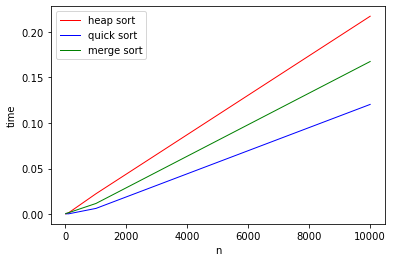

In [57]:
n = [10,100,1000,10000]
plt.plot(n, heaptime, '-r',linewidth=1.0,label = 'heap sort')
plt.plot(n,quicktime,'-b',linewidth=1.0, label = 'quick sort')
plt.plot(n,mergetime,'-g',linewidth=1.0, label = 'merge sort')
plt.xlabel('n')
plt.ylabel('time')
plt.legend() 
plt.show()

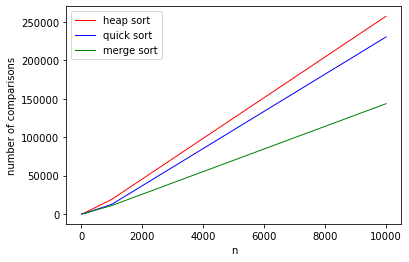

In [88]:
n = [10,100,1000,10000]
plt.plot(n,heapcount_comp_time, '-r',linewidth=1.0,label = 'heap sort')
plt.plot(n,quickcount_comp_time,'-b',linewidth=1.0, label = 'quick sort')
plt.plot(n,mergecount_comp_time,'-g',linewidth=1.0, label = 'merge sort')
plt.xlabel('n')
plt.ylabel('number of comparisons')
plt.legend() 
plt.show()

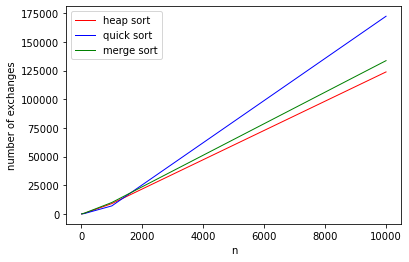

In [89]:
n = [10,100,1000,10000]
plt.plot(n,heapcount_exc_time, '-r',linewidth=1.0,label = 'heap sort')
plt.plot(n,quickcount_exc_time,'-b',linewidth=1.0, label = 'quick sort')
plt.plot(n,mergecount_exc_time,'-g',linewidth=1.0, label = 'merge sort')
plt.xlabel('n')
plt.ylabel('number of exchanges')
plt.legend() 
plt.show()

### What I learnt

As shown above, it is clear to see the differences in the running time, the number of comparisons as well as the number of exchanges between the three types of sort.
Heapsort and mergesort seem to have a similar number of comparisons and exchanges which are relatively low when compared to those of quicksort.
As a result, it can be concluded that the complexity of quicksort is larger than that of mergesort and heapsort.
Therefore, for a large number of elements quicksort should be avoided.